# BTC 시세 예측해보기💰

## 비트코인 3년치 시세 가져오기
**pyupbit**는 업비트 API를 파이썬에서 쉽게 사용할 수 있는 모듈

In [1]:
!pip install pyupbit

You should consider upgrading via the 'C:\Users\dorot\PycharmProjects\KaggleStudy\venv\Scripts\python.exe -m pip install --upgrade pip' command.


In [2]:
import pyupbit

In [3]:
# 업비트에 상장된 코인 리스트 확인(원화 마켓의 암호화폐 선별)
pyupbit.get_tickers(fiat="KRW")

['KRW-BTC',
 'KRW-ETH',
 'KRW-NEO',
 'KRW-MTL',
 'KRW-LTC',
 'KRW-XRP',
 'KRW-ETC',
 'KRW-OMG',
 'KRW-SNT',
 'KRW-WAVES',
 'KRW-XEM',
 'KRW-QTUM',
 'KRW-LSK',
 'KRW-STEEM',
 'KRW-XLM',
 'KRW-ARDR',
 'KRW-ARK',
 'KRW-STORJ',
 'KRW-GRS',
 'KRW-REP',
 'KRW-ADA',
 'KRW-SBD',
 'KRW-POWR',
 'KRW-BTG',
 'KRW-ICX',
 'KRW-EOS',
 'KRW-TRX',
 'KRW-SC',
 'KRW-ONT',
 'KRW-ZIL',
 'KRW-POLY',
 'KRW-ZRX',
 'KRW-LOOM',
 'KRW-BCH',
 'KRW-BAT',
 'KRW-IOST',
 'KRW-RFR',
 'KRW-CVC',
 'KRW-IQ',
 'KRW-IOTA',
 'KRW-MFT',
 'KRW-ONG',
 'KRW-GAS',
 'KRW-UPP',
 'KRW-ELF',
 'KRW-KNC',
 'KRW-BSV',
 'KRW-THETA',
 'KRW-QKC',
 'KRW-BTT',
 'KRW-MOC',
 'KRW-ENJ',
 'KRW-TFUEL',
 'KRW-MANA',
 'KRW-ANKR',
 'KRW-AERGO',
 'KRW-ATOM',
 'KRW-TT',
 'KRW-CRE',
 'KRW-MBL',
 'KRW-WAXP',
 'KRW-HBAR',
 'KRW-MED',
 'KRW-MLK',
 'KRW-STPT',
 'KRW-ORBS',
 'KRW-VET',
 'KRW-CHZ',
 'KRW-STMX',
 'KRW-DKA',
 'KRW-HIVE',
 'KRW-KAVA',
 'KRW-AHT',
 'KRW-LINK',
 'KRW-XTZ',
 'KRW-BORA',
 'KRW-JST',
 'KRW-CRO',
 'KRW-TON',
 'KRW-SXP',
 'KRW-HUNT',

In [4]:
# 코인 현재가 확인
pyupbit.get_current_price(['KRW-BTC', 'KRW-ETH'])

{'KRW-BTC': 52851000.0, 'KRW-ETH': 3662000.0}

In [5]:
# BTC의 과거 데이터 가져오기
ticker = 'KRW-BTC'
interval ='day'    # 봉 길이: 하루단위로 설정
to = '2022-02-15'  # 데이터의 마지막 시점
count = 365*3      # 몇 개의 봉을 가져올지 (3년치니까, 365*3 으로 설정)

pyupbit.get_ohlcv(ticker=ticker, interval=interval, to=to, count=count)

,open,high,low,close,volume,value
2019-02-16 09:00:00,3983000.0,4030000.0,3982000.0,4002000.0,4941.132883,1.978461e+10
2019-02-17 09:00:00,4002000.0,4094000.0,3986000.0,4040000.0,6462.476217,2.595803e+10
2019-02-18 09:00:00,4040000.0,4260000.0,4027000.0,4236000.0,9883.418435,4.090966e+10
2019-02-19 09:00:00,4236000.0,4338000.0,4150000.0,4259000.0,9217.257579,3.921234e+10
2019-02-20 09:00:00,4259000.0,4333000.0,4219000.0,4315000.0,5067.511081,2.168735e+10
...,...,...,...,...,...,...
2022-02-10 09:00:00,53659000.0,55380000.0,52604000.0,53123000.0,9079.394423,4.884284e+11
2022-02-11 09:00:00,53040000.0,53364000.0,51300000.0,51882000.0,6124.946917,3.214801e+11
2022-02-12 09:00:00,51875000.0,52299000.0,50835000.0,51597000.0,4680.168050,2.416202e+11
2022-02-13 09:00:00,51619000.0,52190000.0,51400000.0,51550000.0,2737.452447,1.417964e+11


In [6]:
import pandas as pd
import numpy as np
from datetime import datetime
import matplotlib.pyplot as plt
from keras.models import Sequential
from keras.layers import LSTM, Dropout, Dense, Activation

# matplotlib.pyplot 스타일시트 설정
plt.style.use('fivethirtyeight')

In [7]:
# 코인의 시세 데이터를 저장할 데이터프레임 생성
data = pd.DataFrame()

In [8]:
# 비트코인 시세데이터 가져오기
data = pyupbit.get_ohlcv(ticker=ticker, interval=interval, to=to, count=count)
data

,open,high,low,close,volume,value
2019-02-16 09:00:00,3983000.0,4030000.0,3982000.0,4002000.0,4941.132883,1.978461e+10
2019-02-17 09:00:00,4002000.0,4094000.0,3986000.0,4040000.0,6462.476217,2.595803e+10
2019-02-18 09:00:00,4040000.0,4260000.0,4027000.0,4236000.0,9883.418435,4.090966e+10
2019-02-19 09:00:00,4236000.0,4338000.0,4150000.0,4259000.0,9217.257579,3.921234e+10
2019-02-20 09:00:00,4259000.0,4333000.0,4219000.0,4315000.0,5067.511081,2.168735e+10
...,...,...,...,...,...,...
2022-02-10 09:00:00,53659000.0,55380000.0,52604000.0,53123000.0,9079.394423,4.884284e+11
2022-02-11 09:00:00,53040000.0,53364000.0,51300000.0,51882000.0,6124.946917,3.214801e+11
2022-02-12 09:00:00,51875000.0,52299000.0,50835000.0,51597000.0,4680.168050,2.416202e+11
2022-02-13 09:00:00,51619000.0,52190000.0,51400000.0,51550000.0,2737.452447,1.417964e+11


## EDA

In [9]:
data.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1095 entries, 2019-02-16 09:00:00 to 2022-02-14 09:00:00
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   open    1095 non-null   float64
 1   high    1095 non-null   float64
 2   low     1095 non-null   float64
 3   close   1095 non-null   float64
 4   volume  1095 non-null   float64
 5   value   1095 non-null   float64
dtypes: float64(6)
memory usage: 59.9 KB


In [10]:
data.describe()

,open,high,low,close,volume,value
count,1.095000e+03,1.095000e+03,1.095000e+03,1.095000e+03,1095.000000,1.095000e+03
mean,2.796133e+07,2.865383e+07,2.720263e+07,2.800514e+07,7961.340015,2.556717e+11
std,2.322377e+07,2.378036e+07,2.256912e+07,2.322347e+07,6193.022883,3.051806e+11
min,3.983000e+06,4.030000e+06,3.982000e+06,4.002000e+06,802.758950,7.904937e+09
25%,1.023450e+07,1.051000e+07,1.001750e+07,1.025250e+07,3896.353653,3.903193e+10
50%,1.315000e+07,1.344000e+07,1.289300e+07,1.316500e+07,6538.450248,9.545671e+10
75%,5.032100e+07,5.154400e+07,4.833900e+07,5.035600e+07,9872.012978,4.171286e+11
max,8.140200e+07,8.270000e+07,7.998700e+07,8.140300e+07,53630.665207,1.999142e+12


In [11]:
data.shape

(1095, 6)

In [12]:
data.isnull().sum()

open      0
high      0
low       0
close     0
volume    0
value     0
dtype: int64

## 중간가격 구하기

In [13]:
high_prices = data['high'].values #고가
low_prices = data['low'].values   #저가

mid_prices = (high_prices + low_prices) / 2
mid_prices

array([ 4006000.,  4040000.,  4143500., ..., 51567000., 51795000.,
       51392500.])

In [14]:
seq_len = 50
sequence_length = seq_len +1

result= []
for index in range(len(mid_prices) - sequence_length):
    result.append(mid_prices[index: index + sequence_length])  # 중간값으로 윈도우 채움

In [15]:
result

[array([4006000., 4040000., 4143500., 4244000., 4276000., 4344500.,
        4344000., 4406500., 4359500., 4221000., 4236000., 4208000.,
        4261000., 4247500., 4236000., 4238500., 4188500., 4198000.,
        4253500., 4283000., 4296000., 4341500., 4329500., 4333000.,
        4315500., 4331500., 4336500., 4353500., 4423000., 4416000.,
        4449500., 4469000., 4496000., 4487000., 4492500., 4508000.,
        4515500., 4486500., 4457000., 4515000., 4558500., 4612000.,
        4606500., 4644000., 4690500., 5115500., 5615500., 5585000.,
        5640500., 5808000., 5853500.]),
 array([4040000., 4143500., 4244000., 4276000., 4344500., 4344000.,
        4406500., 4359500., 4221000., 4236000., 4208000., 4261000.,
        4247500., 4236000., 4238500., 4188500., 4198000., 4253500.,
        4283000., 4296000., 4341500., 4329500., 4333000., 4315500.,
        4331500., 4336500., 4353500., 4423000., 4416000., 4449500.,
        4469000., 4496000., 4487000., 4492500., 4508000., 4515500.,
        

In [16]:
len(result)

1044

3년치 시세데이터(총 1,095개 레코드) 중 윈도우 크기인 51개가 제외됨  
(1,095-51 = 1,044)

## Normalize Data
모델의 정확도를 높여주기 위함

In [17]:
normalized_data =[]

for window in result:
    normalized_window = [((float(p)/float(window[0])) - 1) for p in window]
    normalized_data.append(normalized_window)

result = np.array(normalized_data)
result

array([[ 0.        ,  0.00848727,  0.03432351, ...,  0.40801298,
         0.44982526,  0.46118323],
       [ 0.        ,  0.02561881,  0.05049505, ...,  0.43762376,
         0.44888614,  0.47834158],
       [ 0.        ,  0.02425486,  0.0319778 , ...,  0.41269458,
         0.44141426,  0.45179196],
       ...,
       [ 0.        ,  0.02523855,  0.02116568, ..., -0.11966624,
        -0.10790202, -0.13532984],
       [ 0.        , -0.0039726 , -0.01509267, ..., -0.12986301,
        -0.15661563, -0.1689444 ],
       [ 0.        , -0.01116442, -0.0013996 , ..., -0.15325184,
        -0.16562978, -0.16194067]])

In [18]:
result.shape

(1044, 51)

## Split dataset (train:test = 90:10)

In [19]:
row = int(round(result.shape[0] * 0.9))  # result 레코드의 90%
row

940

In [20]:
train = result[:row, :]  # 전체의 90%를 train 데이터셋으로 지정
train

array([[ 0.        ,  0.00848727,  0.03432351, ...,  0.40801298,
         0.44982526,  0.46118323],
       [ 0.        ,  0.02561881,  0.05049505, ...,  0.43762376,
         0.44888614,  0.47834158],
       [ 0.        ,  0.02425486,  0.0319778 , ...,  0.41269458,
         0.44141426,  0.45179196],
       ...,
       [ 0.        , -0.01644987, -0.01483626, ...,  0.30644279,
         0.32747353,  0.32368154],
       [ 0.        ,  0.0016406 ,  0.0049856 , ...,  0.34967553,
         0.34582012,  0.33119144],
       [ 0.        ,  0.00333952,  0.00983657, ...,  0.34361578,
         0.32901107,  0.31880141]])

In [21]:
train.shape

(940, 51)

### train dataset

#### 독립변수(x)
1개의 예측값을 위한 50개의 과거 시세값

In [22]:
x_train = train[:, :-1]
x_train

array([[ 0.        ,  0.00848727,  0.03432351, ...,  0.39415876,
         0.40801298,  0.44982526],
       [ 0.        ,  0.02561881,  0.05049505, ...,  0.39616337,
         0.43762376,  0.44888614],
       [ 0.        ,  0.02425486,  0.0319778 , ...,  0.40171353,
         0.41269458,  0.44141426],
       ...,
       [ 0.        , -0.01644987, -0.01483626, ...,  0.29429588,
         0.30644279,  0.32747353],
       [ 0.        ,  0.0016406 ,  0.0049856 , ...,  0.32829305,
         0.34967553,  0.34582012],
       [ 0.        ,  0.00333952,  0.00983657, ...,  0.34746488,
         0.34361578,  0.32901107]])

In [23]:
x_train.shape

(940, 50)

In [24]:
x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1], 1))
x_train

array([[[ 0.        ],
        [ 0.00848727],
        [ 0.03432351],
        ...,
        [ 0.39415876],
        [ 0.40801298],
        [ 0.44982526]],

       [[ 0.        ],
        [ 0.02561881],
        [ 0.05049505],
        ...,
        [ 0.39616337],
        [ 0.43762376],
        [ 0.44888614]],

       [[ 0.        ],
        [ 0.02425486],
        [ 0.0319778 ],
        ...,
        [ 0.40171353],
        [ 0.41269458],
        [ 0.44141426]],

       ...,

       [[ 0.        ],
        [-0.01644987],
        [-0.01483626],
        ...,
        [ 0.29429588],
        [ 0.30644279],
        [ 0.32747353]],

       [[ 0.        ],
        [ 0.0016406 ],
        [ 0.0049856 ],
        ...,
        [ 0.32829305],
        [ 0.34967553],
        [ 0.34582012]],

       [[ 0.        ],
        [ 0.00333952],
        [ 0.00983657],
        ...,
        [ 0.34746488],
        [ 0.34361578],
        [ 0.32901107]]])

In [25]:
x_train.shape

(940, 50, 1)

#### 종속변수(y)
50개의 과거 시세데이터를 통해 얻어진 1개의 예측값(target)

In [26]:
y_train = train[:, -1]
y_train

array([ 4.61183225e-01,  4.78341584e-01,  4.51791963e-01,  4.43096136e-01,
        4.02712816e-01,  3.32374266e-01,  3.52900552e-01,  3.41881312e-01,
        3.60821195e-01,  3.98483772e-01,  4.22450425e-01,  4.36787072e-01,
        4.24313541e-01,  4.40258976e-01,  4.42870633e-01,  4.59006724e-01,
        5.24173332e-01,  5.30967127e-01,  4.72904667e-01,  4.42563624e-01,
        4.25046555e-01,  4.13912242e-01,  3.99930708e-01,  4.03992615e-01,
        4.25674893e-01,  4.47881796e-01,  5.00749452e-01,  5.17284943e-01,
        5.07800136e-01,  5.04189312e-01,  5.22418249e-01,  5.24837771e-01,
        5.83852313e-01,  6.50991754e-01,  7.85420145e-01,  8.58584738e-01,
        9.46849740e-01,  1.11824362e+00,  1.12889836e+00,  1.11395349e+00,
        9.65229791e-01,  9.42324371e-01,  1.02094866e+00,  1.03628338e+00,
        1.03048715e+00,  8.40582543e-01,  6.55774196e-01,  7.05102954e-01,
        6.99140147e-01,  7.09366391e-01,  7.80985735e-01,  7.27584763e-01,
        7.08918627e-01,  

In [27]:
y_train.shape

(940,)

### test dataset

#### 독립변수(x)

In [28]:
x_test = result[row:, :-1]  # 전체의 10% 레코드 & target을 제외한 50개 값만 선택
x_test

array([[ 0.        ,  0.00647543,  0.03036377, ...,  0.33914368,
         0.32458758,  0.31441191],
       [ 0.        ,  0.02373465,  0.02675329, ...,  0.31606549,
         0.30595529,  0.33019454],
       [ 0.        ,  0.00294866,  0.01027189, ...,  0.27567753,
         0.29935482,  0.29953086],
       ...,
       [ 0.        ,  0.02523855,  0.02116568, ..., -0.11069437,
        -0.11966624, -0.10790202],
       [ 0.        , -0.0039726 , -0.01509267, ..., -0.14133763,
        -0.12986301, -0.15661563],
       [ 0.        , -0.01116442, -0.0013996 , ..., -0.12639252,
        -0.15325184, -0.16562978]])

In [29]:
x_test.shape

(104, 50)

In [30]:
x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1], 1))
x_test

array([[[ 0.        ],
        [ 0.00647543],
        [ 0.03036377],
        ...,
        [ 0.33914368],
        [ 0.32458758],
        [ 0.31441191]],

       [[ 0.        ],
        [ 0.02373465],
        [ 0.02675329],
        ...,
        [ 0.31606549],
        [ 0.30595529],
        [ 0.33019454]],

       [[ 0.        ],
        [ 0.00294866],
        [ 0.01027189],
        ...,
        [ 0.27567753],
        [ 0.29935482],
        [ 0.29953086]],

       ...,

       [[ 0.        ],
        [ 0.02523855],
        [ 0.02116568],
        ...,
        [-0.11069437],
        [-0.11966624],
        [-0.10790202]],

       [[ 0.        ],
        [-0.0039726 ],
        [-0.01509267],
        ...,
        [-0.14133763],
        [-0.12986301],
        [-0.15661563]],

       [[ 0.        ],
        [-0.01116442],
        [-0.0013996 ],
        ...,
        [-0.12639252],
        [-0.15325184],
        [-0.16562978]]])

In [31]:
x_test.shape

(104, 50, 1)

In [32]:
y_test = result[row:, -1]  # 전체의 10% 레코드 & target값만
y_test

array([ 0.33880812,  0.33037476,  0.30585947,  0.30316115,  0.29335761,
        0.29708976,  0.35992638,  0.45727261,  0.53932187,  0.51877903,
        0.45310416,  0.4785553 ,  0.51610504,  0.50924241,  0.42995064,
        0.43378451,  0.42046538,  0.35556109,  0.30396231,  0.25918275,
        0.23270748,  0.20461942,  0.16811556,  0.12898741,  0.06865829,
        0.03798247,  0.0592848 ,  0.06715519,  0.02984613,  0.03184429,
        0.02829935, -0.01879037, -0.15019741, -0.18186535, -0.18700069,
       -0.16526814, -0.20140455, -0.23819569, -0.22931874, -0.20245383,
       -0.16822216, -0.19318875, -0.22307814, -0.19585636, -0.1608256 ,
       -0.19306961, -0.21614522, -0.20129624, -0.20896524, -0.18478448,
       -0.18455369, -0.18013966, -0.16352116, -0.16757357, -0.17663979,
       -0.18353497, -0.24475082, -0.29058253, -0.28812644, -0.27313221,
       -0.26171925, -0.25973443, -0.27430876, -0.27855692, -0.27248935,
       -0.27280659, -0.27846139, -0.26841711, -0.28742359, -0.31

In [33]:
y_test.shape

(104,)

In [34]:
x_train.shape, x_test.shape

((940, 50, 1), (104, 50, 1))

940일의 시세데이터를 가지고 104일의 시세를 예측

### Build a Model

In [35]:
#1. 모델정의
model = Sequential()  #keras.models.sequential() 모델을 순차적으로 정의하는 클래스

#2. 모델에 LSTM 레이어 추가
model.add(LSTM(50, return_sequences = True, input_shape=(50, 1)))  # input 사이즈: (50, 1)
model.add(LSTM(64, return_sequences = False))                      # 유닛 수: 64개 (조정하면서 성능 테스트 가능)

#3. FCL (Fully Connected Layer)
model.add(Dense(1, activation='linear'))                           # 유닛 수: 1개 (다음날 하루의 시세를 예측)

#4. 손실함수(loss function)으로 MSE(Mean Squared Error), optimizer로는 rmsprop 사용
model.compile(loss='mse', optimizer='rmsprop')

#5. 모델의 개요 출력
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 50, 50)            10400     
                                                                 
 lstm_1 (LSTM)               (None, 64)                29440     
                                                                 
 dense (Dense)               (None, 1)                 65        
                                                                 
Total params: 39,905
Trainable params: 39,905
Non-trainable params: 0
_________________________________________________________________


### Training & Prediction

In [36]:
!pip install sklearn

You should consider upgrading via the 'C:\Users\dorot\PycharmProjects\KaggleStudy\venv\Scripts\python.exe -m pip install --upgrade pip' command.


In [37]:
from sklearn.metrics import mean_squared_error, r2_score

# 학습 시작시간 체크
start = datetime.now()

# 모델학습
model.fit(x_train, y_train,
         validation_data = (x_test, y_test),
         batch_size = 10,
         epochs = 20)

# 예측
pred = model.predict(x_test)

# 학습 종료시간 체크
stop = datetime.now()

# 소요시간 계산
delta = stop - start

Epoch 1/20
94/94 [==============================] - 6s 26ms/step - loss: 0.0173 - val_loss: 0.0039
Epoch 2/20
94/94 [==============================] - 2s 16ms/step - loss: 0.0078 - val_loss: 0.0023
Epoch 3/20
94/94 [==============================] - 2s 17ms/step - loss: 0.0059 - val_loss: 0.0020
Epoch 4/20
94/94 [==============================] - 2s 17ms/step - loss: 0.0047 - val_loss: 0.0019
Epoch 5/20
94/94 [==============================] - 2s 17ms/step - loss: 0.0039 - val_loss: 0.0013
Epoch 6/20
94/94 [==============================] - 2s 16ms/step - loss: 0.0032 - val_loss: 0.0012
Epoch 7/20
94/94 [==============================] - 2s 17ms/step - loss: 0.0027 - val_loss: 0.0015
Epoch 8/20
94/94 [==============================] - 2s 16ms/step - loss: 0.0025 - val_loss: 0.0010
Epoch 9/20
94/94 [==============================] - 2s 18ms/step - loss: 0.0022 - val_loss: 8.2952e-04
Epoch 10/20
94/94 [==============================] - 2s 16ms/step - loss: 0.0022 - val_loss: 6.1812e-04
E

### 예측값 시각화

In [38]:
!pip install seaborn

You should consider upgrading via the 'C:\Users\dorot\PycharmProjects\KaggleStudy\venv\Scripts\python.exe -m pip install --upgrade pip' command.


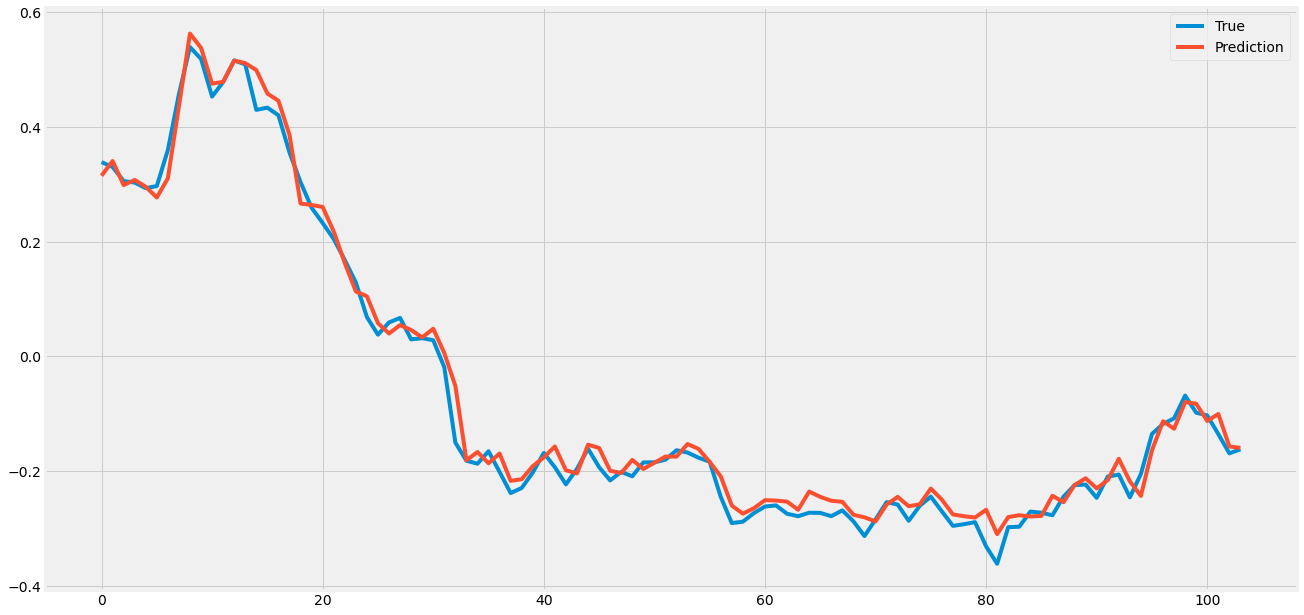

In [39]:
fig = plt.figure(facecolor='white', figsize=(20,10))
ax = fig.add_subplot(111)
ax.plot(y_test, label='True')
ax.plot(pred, label='Prediction')
ax.legend()
plt.show()

### 모델평가

**1. MSE (Mean Squared Error)**  
    예측값과 실제값의 차이인 오차들의 제곱 평균
    
**2. R2 score**  
    분산기반 예측 성능 평가.  
    MAE, MSE와 같은 지표들은 데이터의 scale에 따라 값이 다르지만, R2은 상대적인 성능이 어느정도인지 직관적으로 판단할 수 있음.

**3. RMSE (Root Mean Squared Error)**  
    모델의 예측값과 실제 환경에서 관찰되는 값의 차이를 다룰 때 흔히 사용하는 평가방법  
    
**4. 소요시간**  
    학습부터 예측까지 소요되는 시간

In [40]:
# 평가결과 출력
print('LSTM\n')

# MSE
loss = mean_squared_error(y_test, pred)
print('MSE: ', loss)

# R2
r2 = r2_score(y_test, pred)
print('R2: ', r2)

# RMSE
err = np.sqrt(mean_squared_error(y_test, pred))
print('RMSE: ', err)

# 소요시간
seconds = delta.seconds + delta.microseconds/1E6
print('Time to compute: ', seconds, 'seconds')

lstm = ('LSTM', loss, r2, err, seconds)

LSTM

MSE:  0.0005871978435779035
R2:  0.9910522078415612
RMSE:  0.024232165474383494
Time to compute:  36.56239 seconds
